The table below is about the trips made, for all modes of transport. 

['Commuting' 'Business' 'Shopping' 'Education / childcare'
 'Toeren, wandelen']


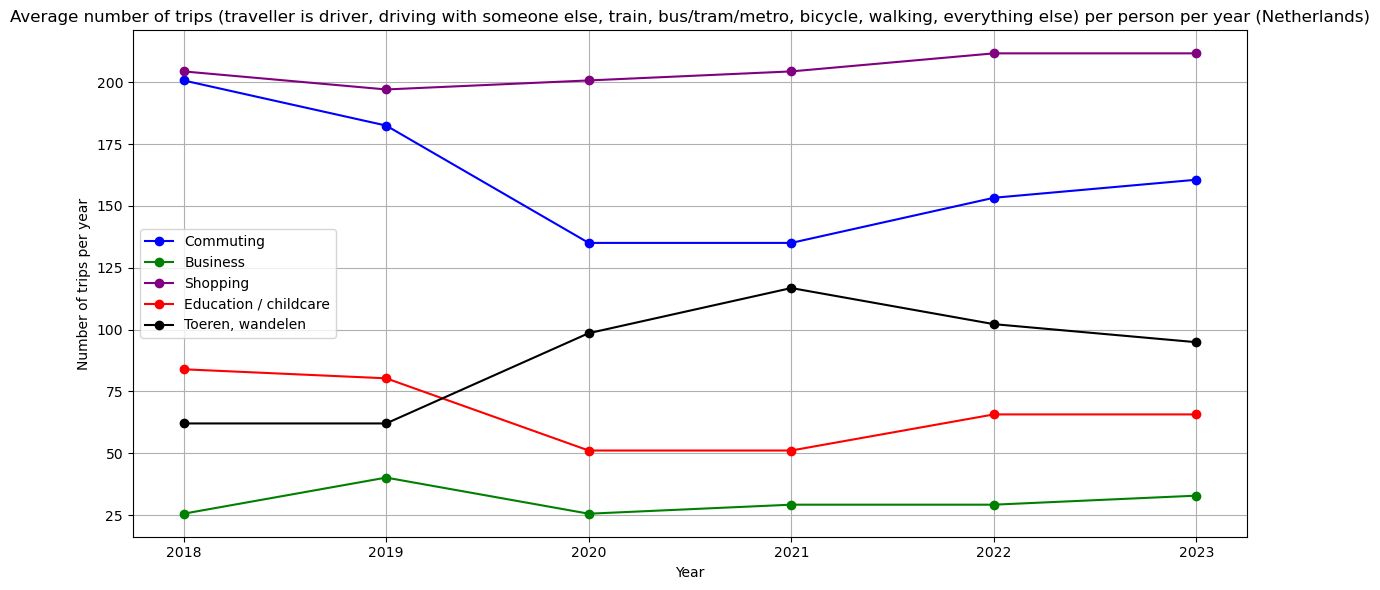

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading csv
path = r"C:\Users\stepk\OneDrive - Delft University of Technology\TIL\TIL 6022\groep 24 data\table__84710NED.csv"
df = pd.read_csv(path)

# Deleting whitespaces in columnnames
df.columns = df.columns.str.strip()

# Filtering: only 'Total' transportmode, no 'Total' travelmotive, only NL
df_filtered = df[
    (df['Vervoerwijzen'] == 'Totaal') &
    (df['Reismotieven'] != 'Totaal') &
    (df['Regio\'s'] == 'Nederland')
].copy()

# Convert year and value to right datatype
df_filtered['Perioden'] = df_filtered['Perioden'].astype(int)

# Columnname for daily average
kolom = 'Gemiddeld per persoon per dag Verplaatsingen (aantal)'

# Converting string to float if necessary
if df_filtered[kolom].dtype == object:
    df_filtered[kolom] = df_filtered[kolom].str.replace(',', '.').astype(float)

# Daily average to yearly (365 days)
df_filtered['Per jaar'] = df_filtered[kolom] * 365

# Defining a consistent color map for travel motives
color_map = {
    'Commuting': 'blue',
    'Business': 'green',
    'Education / childcare': 'red',
    'Shopping': 'purple',
    'Social visit': 'orange',
    'Leisure / going out': 'brown',
    'Sports': 'pink',
    'Walking / cycling': 'cyan',
    'Holiday / day trip': 'magenta',
    'Other': 'grey'
}

# Translation dictionary 
translation = {
    'Van en naar het werk': 'Commuting',
    'Zakelijk, beroepsmatig': 'Business',
    'Onderwijs volgen, cursus, kinderopvang': 'Education / childcare',
    'Winkelen, boodschappen doen': 'Shopping',
    'Sociaal bezoek': 'Social visit',
    'Uitgaan': 'Leisure / going out',
    'Sport': 'Sports',
    'Wandelen of fietsen': 'Walking / cycling',
    'Vakantie, dagje uit': 'Holiday / day trip',
    'Overig': 'Other'
}

# Apply translations
df_filtered['Reismotieven_eng'] = df_filtered['Reismotieven'].replace(translation)

# Check the unique values in 'Reismotieven_eng' to debug
print(df_filtered['Reismotieven_eng'].unique())

# Linegraph per travelmotive (only NL)
plt.figure(figsize=(12,6))
for motief in df_filtered['Reismotieven_eng'].unique():
    # Ensure the color_map exists for the given 'motief', else use a default color
    color = color_map.get(motief, 'black')  # Default to black if no match
    df_motief = df_filtered[df_filtered['Reismotieven_eng'] == motief]
    plt.plot(df_motief['Perioden'], df_motief['Per jaar'], marker='o', label=motief, color=color)

plt.title('Average number of trips (traveller is driver, driving with someone else, train, bus/tram/metro, bicycle, walking, everything else) per person per year (Netherlands)')
plt.xlabel('Year')
plt.ylabel('Number of trips per year')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The next table shows all public transport trips over the span of 2018 - 2023.

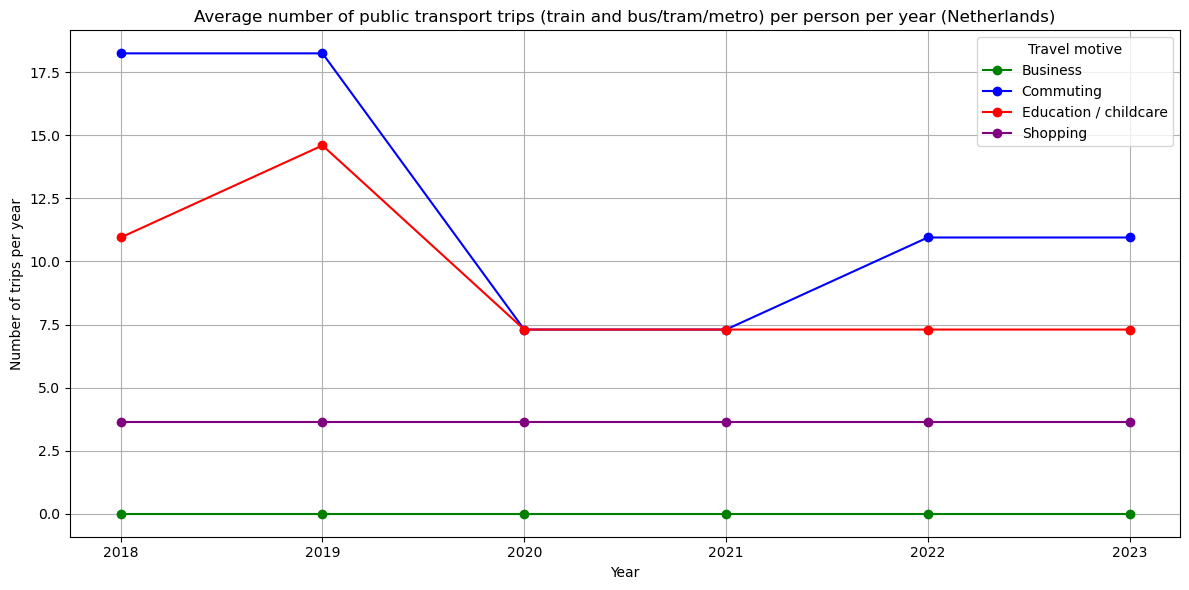

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading csv
path = r"C:\Users\stepk\OneDrive - Delft University of Technology\TIL\TIL 6022\groep 24 data\table__84710NED.csv"
df = pd.read_csv(path)

# Deleting whitespaces in columnnames
df.columns = df.columns.str.strip()

# Filtering: all public transport (train and bus/tram/metro), no 'Total' travel motive, only NL
df_filtered = df[
    df['Vervoerwijzen'].isin(['Trein', 'Bus/tram/metro']) &
    (df['Reismotieven'] != 'Totaal') &
    (df["Regio's"] == 'Nederland')
].copy()

# Convert year and value to the correct datatype
kolom = 'Gemiddeld per persoon per dag Verplaatsingen (aantal)'

# Converting string to float if necessary
df_filtered[kolom] = (
    df_filtered[kolom]
    .astype(str)
    .str.replace(',', '.', regex=False)
)
df_filtered[kolom] = pd.to_numeric(df_filtered[kolom], errors='coerce')
df_filtered = df_filtered.dropna(subset=[kolom])  # Drop rows with missing values in 'kolom'

# Convert 'Perioden' to year (ensure it is of type integer)
df_filtered['Perioden'] = df_filtered['Perioden'].astype(str).str.extract(r'(\d{4})').astype(int)

# Convert daily average to yearly (365 days)
df_filtered['Per jaar'] = df_filtered[kolom] * 365

# Defining a consistent color map for travel motives
color_map = {
    'Commuting': 'blue',
    'Business': 'green',
    'Education / childcare': 'red',
    'Shopping': 'purple',
    'Social visit': 'orange',
    'Leisure / going out': 'brown',
    'Sports': 'pink',
    'Walking / cycling': 'cyan',
    'Holiday / day trip': 'magenta',
    'Other': 'grey'
}

# Translation dictionary
translation = {
    'Van en naar het werk': 'Commuting',
    'Zakelijk, beroepsmatig': 'Business',
    'Onderwijs volgen, cursus, kinderopvang': 'Education / childcare',
    'Winkelen, boodschappen doen': 'Shopping',
    'Sociaal bezoek': 'Social visit',
    'Uitgaan': 'Leisure / going out',
    'Sport': 'Sports',
    'Wandelen of fietsen': 'Walking / cycling',
    'Vakantie, dagje uit': 'Holiday / day trip',
    'Overig': 'Other'
}

# Apply translations
df_filtered['Reismotieven_eng'] = df_filtered['Reismotieven'].replace(translation)

# Group by 'Perioden' and 'Reismotieven_eng' and sum the 'Per jaar' values
df_grouped = df_filtered.groupby(['Perioden', 'Reismotieven_eng'])['Per jaar'].sum().reset_index()

# Plot the results
plt.figure(figsize=(12, 6))
for motief in df_grouped['Reismotieven_eng'].unique():
    df_motief = df_grouped[df_grouped['Reismotieven_eng'] == motief]
    # Ensure color consistency by mapping the colors from 'color_map'
    color = color_map.get(motief, 'black')  # Default to black if no match
    plt.plot(df_motief['Perioden'], df_motief['Per jaar'], marker='o', label=motief, color=color)

plt.title('Average number of public transport trips (train and bus/tram/metro) per person per year (Netherlands)')
plt.xlabel('Year')
plt.ylabel('Number of trips per year')
plt.legend(title='Travel motive')
plt.grid(True)
plt.tight_layout()
plt.show()